## 산점도 그리기

In [2]:
market = read.table("reg/market-1.txt", header=T)
head(market)

ID,X,Y
1,4.2,9.3
2,8.5,18.5
3,9.3,22.8
4,7.5,17.7
5,6.3,14.6
6,12.2,27.9


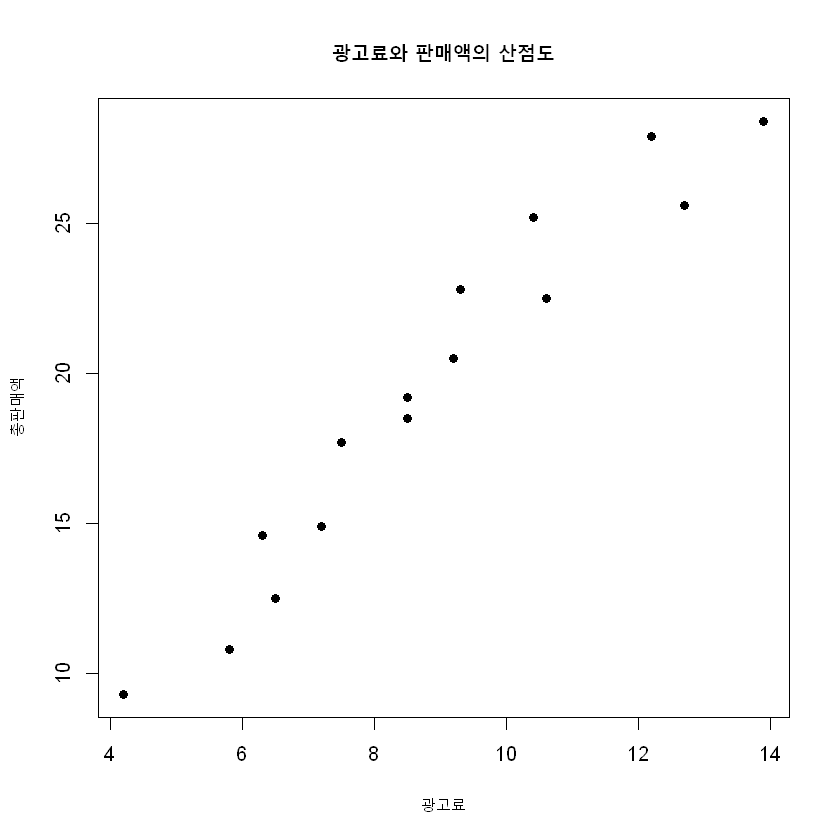

In [4]:
plot(market$X, market$Y, xlab="광고료", ylab="총판매액", pch=19)
title("광고료와 판매액의 산점도")

## 회귀선의 추정

In [5]:
market.lm = lm(Y ~ X, data=market)
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


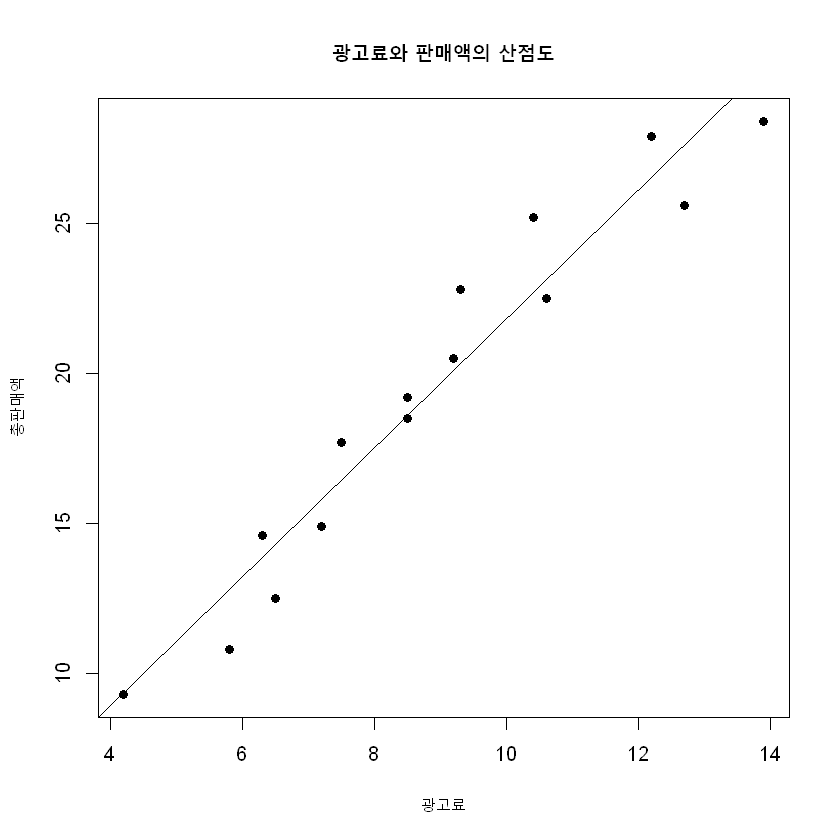

In [6]:
plot(market$X ,market$Y, xlab="광고료", ylab="총판매액", pch=19)
title("광고료와 판매액의 산점도")
abline(market.lm)

## 잔차

In [7]:
names(market.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [9]:
# 잔차항들
market.lm$resid

1           2           3           4           5           6 
-0.05685083 -0.10044856  2.47981233  1.24922533  0.72883400  1.34575804 
          7           8           9          10          11          12 
-1.80110078  2.51517105 -1.99632905  0.39477972 -0.90587250  0.59955144 
         13          14          15 
-0.61476373 -1.80868757 -2.02907890

In [10]:
# 잔차항들의 합
sum(market.lm$resid)

[1] -2.498002e-16

In [11]:
# 잔차와 독릭변수의 곱의 합(가중합)
sum(market$X*market.lm$resid)

[1] -1.360023e-15

## 회귀모형의 정도

In [12]:
# 분산분석표
anova(market.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


In [13]:
# 유의수준 a=0.05에서 F-기각역 F(1, 13;0.05)
qf(0.95, 1, 13)

[1] 4.667193

In [14]:
# 유의확률 p값
1-pf(192.9, 1, 13)

[1] 3.554018e-09

In [15]:
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


## 단순회귀의 추정과 검정

In [22]:
# 3.5부터 14.5까지 0.2씩
pred.frame = data.frame(X=seq(3.5, 14.5, 0.2))
pc = predict(market.lm, int="c", newdata=pred.frame)
pp = predict(market.lm, int="p", newdata=pred.frame)

fit,lwr,upr
7.852079,5.855247,9.848911
8.282014,6.344903,10.219125
8.711949,6.834076,10.589821
9.141883,7.322721,10.961046
9.571818,7.810782,11.332854
10.001753,8.298202,11.705304


In [23]:
# 기댓값의 신뢰구간
head(pc)

fit,lwr,upr
7.852079,5.855247,9.848911
8.282014,6.344903,10.219125
8.711949,6.834076,10.589821
9.141883,7.322721,10.961046
9.571818,7.810782,11.332854
10.001753,8.298202,11.705304


In [24]:
# 새로운갑의 신뢰구간
head(pp)

fit,lwr,upr
7.852079,3.885278,11.81888
8.282014,4.344937,12.21909
8.711949,4.803678,12.62022
9.141883,5.261481,13.02229
9.571818,5.718324,13.42531
10.001753,6.174188,13.82932


## 가중회귀

In [1]:
x=c(1,2,3,4,5)
y=c(2,3,5,8,7)
w = 1/x
w.lm = lm(y~ x, weights = x)
summary(w.lm)


Call:
lm(formula = y ~ x, weights = x)

Weighted Residuals:
      1       2       3       4       5 
-0.3429 -1.0102 -0.1485  3.0857 -1.8527 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.9714     1.7391   0.559   0.6154  
x             1.3714     0.4490   3.054   0.0552 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.169 on 3 degrees of freedom
Multiple R-squared:  0.7567,	Adjusted R-squared:  0.6755 
F-statistic: 9.328 on 1 and 3 DF,  p-value: 0.05525


In [2]:
anova(w.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,43.88571,43.885714,9.327935,0.05524624
Residuals,3,14.11429,4.704762,NA,NA


## 분석사례

In [5]:
super=read.table("reg/supermarket.txt", header=T)
head(super,3)

price,time
6.4,1.7
16.1,2.7
42.1,4.9


In [6]:
super.lm=lm(time ~ price, data=super)
summary(super.lm)


Call:
lm(formula = time ~ price, data = super)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37928 -0.32771 -0.04431  0.32231  0.56126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.396460   0.191488    2.07   0.0722 .  
price       0.115982   0.008979   12.92 1.22e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3925 on 8 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9485 
F-statistic: 166.9 on 1 and 8 DF,  p-value: 1.221e-06


In [7]:
anova(super.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
price,1,25.703598,25.7035980,166.852,1.220793e-06
Residuals,8,1.232402,0.1540502,NA,NA


In [8]:
names(super.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [9]:
cbind(super, super.lm$resid, super.lm$fitted)

price,time,super.lm$resid,super.lm$fitted
6.4,1.7,0.56125840,1.138742
16.1,2.7,0.43623742,2.263763
42.1,4.9,-0.37928275,5.279283
2.1,0.3,-0.34002095,0.640021
30.7,3.9,-0.05709314,3.957093
32.1,4.1,-0.01946730,4.119467
7.2,1.2,-0.03152683,1.231527
3.4,0.5,-0.29079696,0.790797
20.8,3.3,0.49112416,2.808876
1.5,0.2,-0.37043203,0.570432


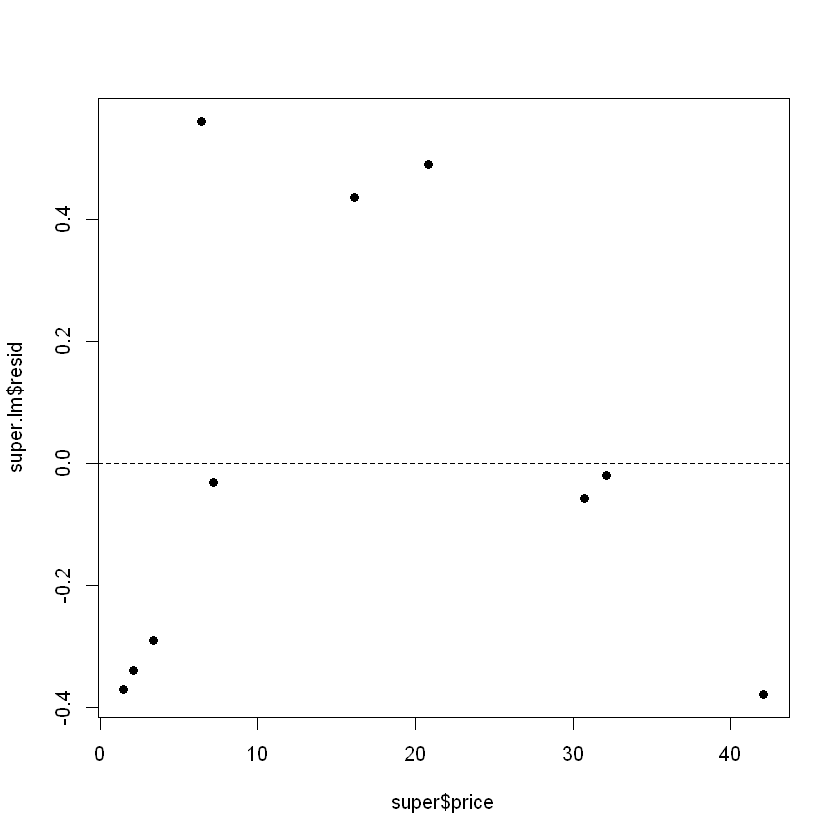

In [11]:
plot(super$price, super.lm$resid, pch=19)
abline(h=0, lty=2)

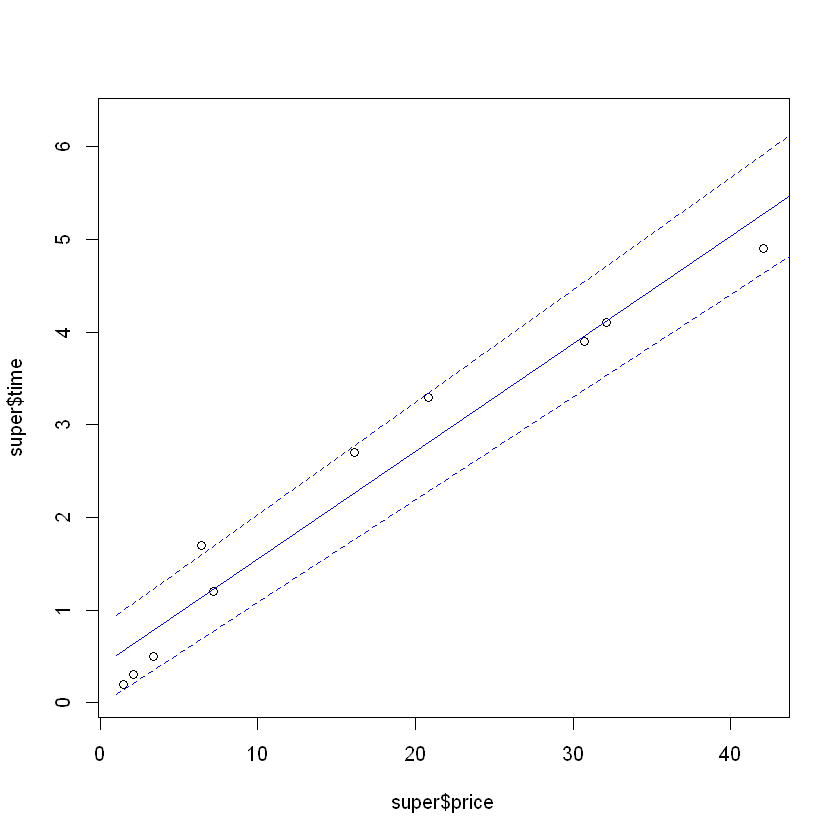

In [12]:
p.x=data.frame(price=c(1,45))
pc=predict(super.lm, int="c", newdata=p.x)
pred.x=p.x$price
plot(super$price, super$time, ylim=range(super$time, pc))
matlines(pred.x, pc, lty=c(1,2,2), col="BLUE")